In [1]:
# https://www.kaggle.com/mirichoi0218/insurance

In [27]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
# Check for null entries in data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
# Encode the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

le.fit(df.smoker)
df.smoker = le.transform(df.smoker)

le.fit(df.region)
df.region = le.transform(df.region)

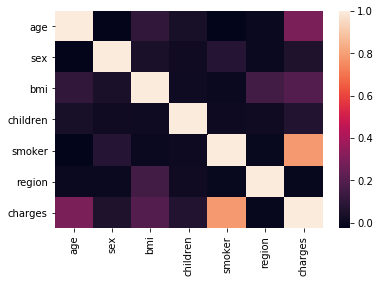

In [20]:
# Check for correlation in data
import seaborn as sns
sns.heatmap(df.corr())

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

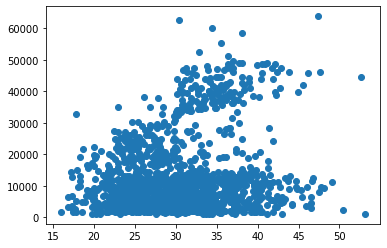

In [14]:
# plt.scatter(df.age, df.charges)
plt.scatter(df.bmi, df.charges)
# plt.scatter(df.children, df.charges)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc170b87d0>,
      dtype=object)

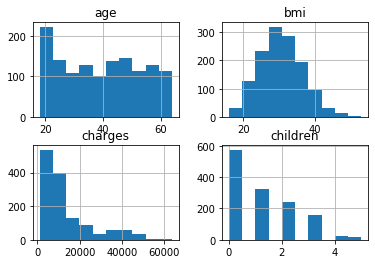

In [6]:
df.hist()

In [36]:
# Split the data
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis=1)
y = df.charges
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 42)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
pred_y = lr.predict(test_x)

In [41]:
# Finding accuracy
lr.score(test_x, test_y)

0.7668905583460909

In [42]:
# Try Polynomial features with degree 2

In [46]:
from sklearn.preprocessing import PolynomialFeatures
plf = PolynomialFeatures(degree = 2)
poly_y = df.charges
poly_df = plf.fit_transform(df.drop(['charges', 'region'], axis = 1))

In [49]:
# Split the data
train_x, test_x, train_y, test_y = train_test_split(poly_df, poly_y, random_state = 42)

In [50]:
lr_poly = LinearRegression()

In [51]:
lr_poly.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lr_poly.score(test_x, test_y)

0.854082880350387

In [55]:
# Try with varying degrees 
from sklearn.preprocessing import PolynomialFeatures
for i in range(2, 100):
    plf = PolynomialFeatures(degree = i)
    poly_y = df.charges
    poly_df = plf.fit_transform(df.drop(['charges', 'region'], axis = 1))
    # Split the data
    train_x, test_x, train_y, test_y = train_test_split(poly_df, poly_y, random_state = 42)
    lr_poly = LinearRegression()
    lr_poly.fit(train_x, train_y)
    print(i, " : ", lr_poly.score(test_x, test_y))

2  :  0.854082880350387
3  :  0.8512443227700693
4  :  0.8060368414591801
5  :  0.770644333891908
6  :  -1.7275916819528847
7  :  -115.86878101054852
8  :  -17883.25635926277
9  :  -48176.64000787618
10  :  -57367.30793325436


KeyboardInterrupt: 

In [57]:
# Peak achieved at degree 2, hence degree 2 will work

In [62]:
# Try Elastic net regression, 
from sklearn.linear_model import ElasticNet, Ridge, Lasso

In [59]:
# Split the data
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis=1)
y = df.charges
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 42)

In [69]:
eln = ElasticNet(alpha=0.2).fit(train_x, train_y)
ridge = Ridge(alpha=0.2).fit(train_x, train_y)
lasso = Lasso(alpha=0.2).fit(train_x, train_y)

In [70]:
eln.score(test_x, test_y)

0.6660352652056076

In [71]:
ridge.score(test_x, test_y)

0.7668425608866567

In [72]:
lasso.score(test_x, test_y)

0.7668894873340849

In [78]:
# Iterate over alpha
print("i", "\t", "elast", "\t","ridge", "\t","lasso")
lasso_acc = list()
ridge_acc = list()
eln_acc = list()
for i in range(1, 100):
    eln_acc.append(ElasticNet(alpha=float(i / 100)).fit(train_x, train_y).score(test_x, test_y))
    ridge_acc.append(Ridge(alpha=float(i / 100)).fit(train_x, train_y).score(test_x, test_y))
    lasso_acc.append(Lasso(alpha=float(i / 100)).fit(train_x, train_y).score(test_x, test_y))

i 	 elast 	 ridge 	 lasso


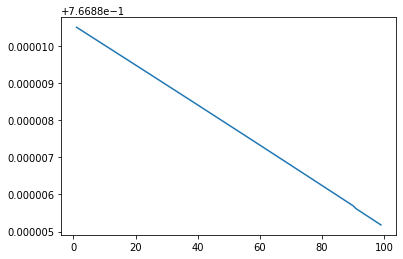

In [86]:
# plt.plot(range(1, 100), eln_acc)
# plt.plot(range(1, 100), ridge_acc)
plt.plot(range(1, 100), lasso_acc)
plt.show()

In [89]:
lasso_acc

[0.7668905049463026,
 0.76689045157739,
 0.7668903981940203,
 0.7668903436651658,
 0.7668902902529011,
 0.7668902368261794,
 0.7668901833850006,
 0.7668901299293648,
 0.7668900764592719,
 0.766890022974722,
 0.7668899694757151,
 0.766889915962251,
 0.7668898624343299,
 0.7668898088919518,
 0.7668897553351167,
 0.7668897017638244,
 0.7668896481780751,
 0.7668895945778686,
 0.7668895409632055,
 0.7668894873340849,
 0.7668894336905074,
 0.766889380032473,
 0.7668893263599813,
 0.7668892726730326,
 0.766889218971627,
 0.7668891652557642,
 0.7668891115254443,
 0.7668890577806676,
 0.7668890040214337,
 0.7668889502477427,
 0.7668888964595947,
 0.7668888426569898,
 0.7668887888399277,
 0.7668887350084084,
 0.7668886811624323,
 0.7668886273019989,
 0.7668885734271088,
 0.7668885195377613,
 0.766888465633957,
 0.7668884117156956,
 0.7668883577829769,
 0.7668883038358014,
 0.7668882498741688,
 0.7668881958980791,
 0.7668881419075324,
 0.7668880879025286,
 0.7668880338830677,
 0.7668879798491499,

# TODO Learn about forest regresson and apply the same on this dataset